In [120]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import sys
from os import path
sys.path.insert(0, "../ISANet/")
sys.path.insert(0, "./")

from isanet.model import Mlp
from isanet.optimizer import SGD, NCG, LBFGS
from isanet.optimizer.utils import l_norm
from isanet.datasets.monk import load_monk
from isanet.utils.model_utils import printMSE, printAcc, plotHistory
import matplotlib.pyplot as plt
import numpy as np
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
def get_fitted_model(X_train, Y_train, optimizer, n_seed = 189, verbose = 1):
    np.random.seed(seed=n_seed)
    print("Build the model")
    model = Mlp()
    model.add(4, input= 17, kernel_initializer = 0.003, kernel_regularizer = 0.001)
    model.add(1, kernel_initializer = 0.003, kernel_regularizer = 0.001)

    print("norm_w0: {}".format(l_norm(model.weights)))
    print("sum_w0: {}".format([np.sum(np.square(x)) for x in model.weights]))
    model.set_optimizer(optimizer)
    start = time.time()
    model.fit(X_train,
            Y_train, 
            epochs=1000, 
            verbose=verbose)
    end = time.time()
    return model, (end - start)

def ls_stat(info):
    converged = 0
    tot_iteration = 0
    tot = len(info["ls_conv"])
    for i in range(tot):
        tot_iteration += info["ls_it"][i] + info["zoom_it"][i]
        if info["ls_conv"][i] == "y":
            converged += 1
    
    print("Ls Hit Rate: {}".format(converged/tot))
    print("Ls iteration: {}".format(tot_iteration))

# MONK 1

In [122]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("1", "train")

seed = 412 #56#108
results = []

Load Monk DataSet


In [124]:
#############################
#     NCG f1 - no restart
#############################
restart = None
optimizer = NCG(beta_method="fr", c1=1e-4, c2=.3, restart=restart, ln_maxiter = 100, norm_g_eps = 1e-11, l_eps = 1e-11)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_fr_no_restart = model.history
results.append(h_fr_no_restart["loss_mse"][-1]) 

Build the model
norm_w0: 0.014727600904459997
sum_w0: [0.00020340981754667157, 1.349241085437935e-05]
| beta: 0 | alpha: 0.08173045902158597 | ng: 0.026276302858068975 | ls conv: y, it: 0, time: 0.0042 | zoom used: y, conv: y, it: 2|
Epoch: 1 - time: 0.0084 - loss_train: 0.25000007621666165 - loss_val: 0
| beta: 0.110144124176174 | alpha: 0.20742518403187077 | ng: 0.008720571070390043 | ls conv: y, it: 0, time: 0.0014 | zoom used: y, conv: y, it: 1|
Epoch: 2 - time: 0.0036 - loss_train: 0.2499999783438108 - loss_val: 0
| beta: 0.8381804339289568 | alpha: 0.4979427739022049 | ng: 0.007983874198125167 | ls conv: y, it: 0, time: 0.0005 | zoom used: y, conv: y, it: 0|
Epoch: 3 - time: 0.0024 - loss_train: 0.24999978893879352 - loss_val: 0
| beta: 5.183439551940587 | alpha: 334.28684492527617 | ng: 0.01817702080445543 | ls conv: y, it: 9, time: 0.0104 | zoom used: y, conv: y, it: 5|
Epoch: 4 - time: 0.0132 - loss_train: 0.1516025842339096 - loss_val: 0
| beta: 47320.19807358561 | alpha: 0.0

../ISANet/isanet/activation.py:89: RuntimeWarning: overflow encountered in exp
  return 1 / ( 1 + np.exp(-self.a*x))


| beta: 1.0541246829790165 | alpha: 0.000914880536584513 | ng: 4.7422021562617855 | ls conv: y, it: 0, time: 0.0117 | zoom used: y, conv: y, it: 9|
Epoch: 22 - time: 0.0194 - loss_train: 0.15063545967882794 - loss_val: 0
| beta: 1.1511552263023068 | alpha: 0.000469102586965932 | ng: 5.087998896380398 | ls conv: y, it: 0, time: 0.0076 | zoom used: y, conv: y, it: 8|
Epoch: 23 - time: 0.0159 - loss_train: 0.15056206311878367 - loss_val: 0
| beta: 1.0779513767150164 | alpha: 0.000503498170105435 | ng: 5.282586220686457 | ls conv: y, it: 0, time: 0.0054 | zoom used: y, conv: y, it: 8|
Epoch: 24 - time: 0.0131 - loss_train: 0.15045557259691292 - loss_val: 0
| beta: 1.0560909365939897 | alpha: 0.000526825175533664 | ng: 5.428717619464358 | ls conv: y, it: 0, time: 0.0118 | zoom used: y, conv: y, it: 8|
Epoch: 25 - time: 0.0153 - loss_train: 0.15033904726381486 - loss_val: 0
| beta: 1.0142618148245466 | alpha: 0.0005288745055046096 | ng: 5.467292253018475 | ls conv: y, it: 0, time: 0.0126 | z

In [125]:
#############################
#     NCG f1 - 15 restart
#############################
restart = 15
optimizer = NCG(beta_method="fr", c1=1e-4, c2=.3, restart=restart, ln_maxiter = 100, norm_g_eps = 1e-11, l_eps = 1e-11)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)

h_fr_r_15 = model.history
results.append(h_fr_r_15["loss_mse"]) 

Build the model
norm_w0: 0.014727600904459997
sum_w0: [0.00020340981754667157, 1.349241085437935e-05]
| beta: 0 | alpha: 0.08173045902158597 | ng: 0.026276302858068975 | ls conv: y, it: 0, time: 0.0012 | zoom used: y, conv: y, it: 2|
Epoch: 1 - time: 0.0047 - loss_train: 0.25000007621666165 - loss_val: 0
| beta: 0.110144124176174 | alpha: 0.20742518403187077 | ng: 0.008720571070390043 | ls conv: y, it: 0, time: 0.0008 | zoom used: y, conv: y, it: 1|
Epoch: 2 - time: 0.0030 - loss_train: 0.2499999783438108 - loss_val: 0
| beta: 0.8381804339289568 | alpha: 0.4979427739022049 | ng: 0.007983874198125167 | ls conv: y, it: 0, time: 0.0013 | zoom used: y, conv: y, it: 0|
Epoch: 3 - time: 0.0100 - loss_train: 0.24999978893879352 - loss_val: 0
| beta: 5.183439551940587 | alpha: 334.28684492527617 | ng: 0.01817702080445543 | ls conv: y, it: 9, time: 0.0098 | zoom used: y, conv: y, it: 5|
Epoch: 4 - time: 0.0128 - loss_train: 0.1516025842339096 - loss_val: 0
| beta: 47320.19807358561 | alpha: 0.0

../ISANet/isanet/activation.py:89: RuntimeWarning: overflow encountered in exp
  return 1 / ( 1 + np.exp(-self.a*x))


| beta: 2.266303110001114 | alpha: 0.03856594611492922 | ng: 1.7713781418317804 | ls conv: y, it: 0, time: 0.0025 | zoom used: y, conv: y, it: 3|
Epoch: 27 - time: 0.0043 - loss_train: 0.10838342812463292 - loss_val: 0
| beta: 0.7187903111064311 | alpha: 0.03730160001509247 | ng: 1.5018009978461297 | ls conv: y, it: 0, time: 0.0079 | zoom used: y, conv: y, it: 3|
Epoch: 28 - time: 0.0122 - loss_train: 0.1075921864709013 - loss_val: 0
| beta: 0.4874279381062593 | alpha: 0.20870739817750225 | ng: 1.0484979788998487 | ls conv: y, it: 0, time: 0.0025 | zoom used: y, conv: y, it: 1|
Epoch: 29 - time: 0.0049 - loss_train: 0.10618796275594156 - loss_val: 0
| beta: 0.7259285456638572 | alpha: 1.0 | ng: 0.8933353812277118 | ls conv: y, it: 0, time: 0.0004 | zoom used: n, conv: -, it: 0|
Epoch: 30 - time: 0.0032 - loss_train: 0.1003938487335857 - loss_val: 0
| beta: 0 | alpha: 0.08730060648527369 | ng: 1.4070241147887035 | ls conv: y, it: 0, time: 0.0025 | zoom used: y, conv: y, it: 2|
Epoch: 31

In [127]:
#############################
#     NCG f1 - 3 restart
#############################
restart = 3
optimizer = NCG(beta_method="fr", c1=1e-4, c2=.3, restart=restart, ln_maxiter = 100, norm_g_eps = 1e-11, l_eps = 1e-11)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
h_fr_r_3 = model.history
results.append(h_fr_r_3["loss_mse"]) 

Build the model
norm_w0: 0.014727600904459997
sum_w0: [0.00020340981754667157, 1.349241085437935e-05]
| beta: 0 | alpha: 0.08173045902158597 | ng: 0.026276302858068975 | ls conv: y, it: 0, time: 0.0019 | zoom used: y, conv: y, it: 2|
Epoch: 1 - time: 0.0063 - loss_train: 0.25000007621666165 - loss_val: 0
| beta: 0.110144124176174 | alpha: 0.20742518403187077 | ng: 0.008720571070390043 | ls conv: y, it: 0, time: 0.0008 | zoom used: y, conv: y, it: 1|
Epoch: 2 - time: 0.0033 - loss_train: 0.2499999783438108 - loss_val: 0
| beta: 0.8381804339289568 | alpha: 0.4979427739022049 | ng: 0.007983874198125167 | ls conv: y, it: 0, time: 0.0010 | zoom used: y, conv: y, it: 0|
Epoch: 3 - time: 0.0038 - loss_train: 0.24999978893879352 - loss_val: 0
| beta: 0 | alpha: 0.08369908321480714 | ng: 0.01817702080445543 | ls conv: y, it: 0, time: 0.0013 | zoom used: y, conv: y, it: 2|
Epoch: 4 - time: 0.0037 - loss_train: 0.24999957983956547 - loss_val: 0
| beta: 0.2808891662890172 | alpha: 655.595198187556

../ISANet/isanet/activation.py:89: RuntimeWarning: overflow encountered in exp
  return 1 / ( 1 + np.exp(-self.a*x))


| beta: 3.5829979209735967 | alpha: 0.20561430710565518 | ng: 1.5391648016024406 | ls conv: y, it: 0, time: 0.0092 | zoom used: y, conv: y, it: 1|
Epoch: 33 - time: 0.0148 - loss_train: 0.09130295376600438 - loss_val: 0
| beta: 0 | alpha: 0.08823452401637095 | ng: 1.980224006502515 | ls conv: y, it: 0, time: 0.0031 | zoom used: y, conv: y, it: 2|
Epoch: 34 - time: 0.0074 - loss_train: 0.0881158511171853 - loss_val: 0
| beta: 0.40847051543719176 | alpha: 0.5014043930954888 | ng: 1.2655947887932717 | ls conv: y, it: 0, time: 0.0012 | zoom used: y, conv: y, it: 0|
Epoch: 35 - time: 0.0053 - loss_train: 0.07989283771702832 - loss_val: 0
| beta: 1.0942863087792245 | alpha: 0.15623664930269776 | ng: 1.32391517657125 | ls conv: y, it: 0, time: 0.0029 | zoom used: y, conv: y, it: 3|
Epoch: 36 - time: 0.0071 - loss_train: 0.0773617260590974 - loss_val: 0
| beta: 0 | alpha: 0.08863339643294002 | ng: 1.6090294569509016 | ls conv: y, it: 0, time: 0.0029 | zoom used: y, conv: y, it: 2|
Epoch: 37 - 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


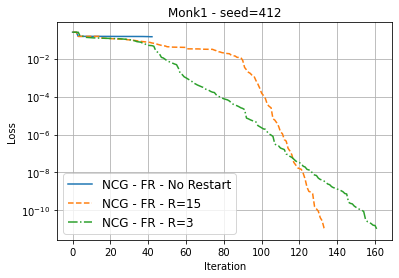

In [128]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_fr_no_restart["loss_mse"], linestyle='-')
plt.plot(h_fr_r_15["loss_mse"], linestyle = '--')
plt.plot(h_fr_r_3["loss_mse"], linestyle='-.')
plt.title('Monk1 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - FR - No Restart','NCG - FR - R={}'.format(15),'NCG - FR - R={}'.format(3)], loc='lower left', fontsize='large')
plt.savefig('./plot/monk1_fr.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


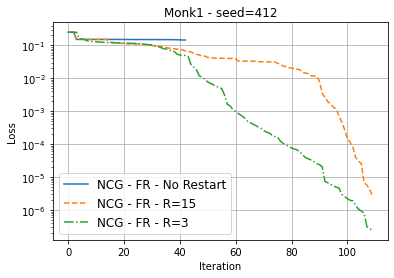

In [111]:
pos_train = (0,0)
figsize = (12, 4)
zoom = 110
plt.plot(h_fr_no_restart["loss_mse"][:zoom], linestyle='-')
plt.plot(h_fr_r_15["loss_mse"][:zoom], linestyle = '--')
plt.plot(h_fr_r_3["loss_mse"][:zoom], linestyle='-.')
plt.title('Monk1 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - FR - No Restart','NCG - FR - R={}'.format(15),'NCG - FR - R={}'.format(3)], loc='lower left', fontsize='large')
plt.savefig('./plot/monk1_fr_zoomed.eps', format='eps')
plt.show()

In [10]:
#############################
#     NCG f1 - 3 restart
#############################
restart = 3
seed = 206
optimizer = NCG(beta_method="fr", c1=1e-4, c2=.9, restart=restart, ln_maxiter = 100, tol = 1e-17)

model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_fr_r_3 = model.history
results.append(h_fr_r_3["loss_mse"]) 

Build the model

Alpha: 0.0824501614813726 - norm_g: 0.0211999915986544
Epoch: 1 - time: 0.0030 - loss_train: 0.24999994411488569 - loss_val: 0

Beta: 0.16708242232764023 -> compute alpha: Alpha: 1.0 - norm_g: 0.008665648525836844
Epoch: 2 - time: 0.0030 - loss_train: 0.24999945024151565 - loss_val: 0

Beta: 14.50791172111258 -> compute alpha: Alpha: 87.3694498213177 - norm_g: 0.03300680766085845
Epoch: 3 - time: 0.0080 - loss_train: 0.15144784463525593 - loss_val: 0

Beta: 0 -> compute alpha: Alpha: 0.08849590375035885 - norm_g: 3.3174679891921506
Epoch: 4 - time: 0.0030 - loss_train: 0.14454454004957784 - loss_val: 0

Beta: 2.200596721551795 -> compute alpha: Alpha: 0.08993440191007193 - norm_g: 4.921267495832583
Epoch: 5 - time: 0.0030 - loss_train: 0.1315178556895022 - loss_val: 0

Beta: 0.226538140480583 -> compute alpha: Alpha: 0.03515862374651911 - norm_g: 2.3423276088922793
Epoch: 6 - time: 0.0030 - loss_train: 0.1301129463896159 - loss_val: 0

Beta: 0 -> compute alpha: Alpha: 

NameError: name 'h_fr' is not defined